#### 主要内容
主要就是学习了解keras构建神经网络时的基本框架和流程，如何添加隐藏层、激活函数、迭代等。

#### 线性回归

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
# 按顺序构成的模型
from keras.models import Sequential
# 全连接层模块
from keras.layers import Dense

Using TensorFlow backend.


cost is 0.010370156727731228
cost is 0.00011770331184379756
cost is 9.424651943845674e-05
cost is 8.771229477133602e-05
cost is 8.589204662712291e-05
cost is 8.538502879673615e-05
cost is 8.524380973540246e-05
cost is 8.520446135662496e-05
cost is 8.519347466062754e-05
cost is 8.519043331034482e-05
cost is 8.51896038511768e-05
[[0.19885324]] [0.09950154]


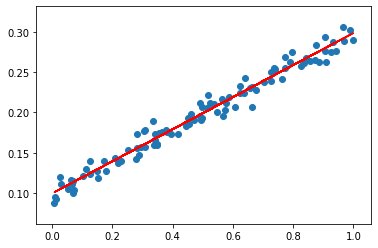

In [2]:
# 生成数据
x_data = np.random.rand(100)
noise = np.random.normal(0.0, 0.01, x_data.shape)
y_data = 0.2*x_data + 0.1 + noise

model = Sequential()
model.add(Dense(units=1, input_dim=1))    # units: 输出的维度;  input_dim: 输出的维度
model.compile(optimizer='sgd', loss='mse')    # 使用随机梯度进行优化，损失用mse度量

# 第一种训练的方法（第二种更常用）
for i in range(5001):
    cost = model.train_on_batch(x_data, y_data)
    if i%500==0:
        print('cost is {}'.format(cost))

# 第二种性训练模型的方法
# model.fit(x_data, y_data, epochs=3000)
        
# 打印训练的参数结果
w,b = model.layers[0].get_weights()
print(w,b)
y_pred = model.predict(x_data)

plt.scatter(x_data,y_data)
plt.plot(x_data, y_pred, 'r')
plt.show()

#### 非线性回归

In [3]:
import numpy as np
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt

cost is 8.51896038511768e-05
cost is 8.51896038511768e-05
cost is 8.51896038511768e-05
cost is 8.51896038511768e-05
cost is 8.51896038511768e-05
cost is 8.51896038511768e-05
cost is 8.51896038511768e-05


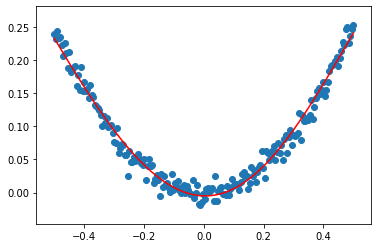

In [4]:
x_data = np.linspace(-0.5, 0.5, 200)
noise = np.random.normal(0.0, 0.01, x_data.shape)
y_data = np.square(x_data) + noise

# input ---> 10 ---> 1
model = Sequential()
model.add(Dense(units=10, input_dim=1, activation='tanh'))
model.add(Dense(units=1, activation='tanh'))

sgd = SGD(lr=0.3)
model.compile(optimizer=sgd, loss='mse')
for i in range(3001):
    loss = model.train_on_batch(x_data, y_data)
    if i%500==0:
        print('cost is {}'.format(cost))
y_pred = model.predict(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')
plt.show()